In [1]:
import pandas as pd
import re
import numpy as np
from scipy import stats

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from dateutil import parser
from datetime import datetime

from math import ceil

# Purpose

This notebook will identify stations with unusual staffing.

# Data

In [3]:
master = pd.read_csv("../Master/Master.csv")


### Here's a histogram showing the percent increase of choice hires compared with 2014 staffing levels

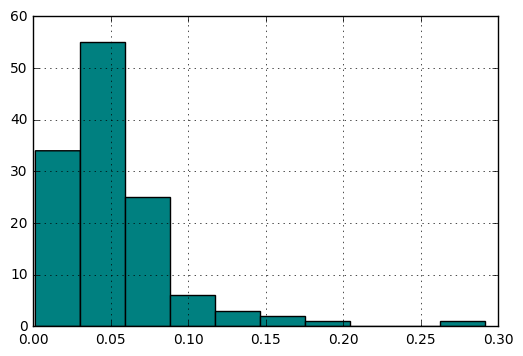

In [27]:
master["Choice_Increase_%"].hist(color='teal')

### This histogram looks at the percent increase in staff at VA stations from 2014 to 2016

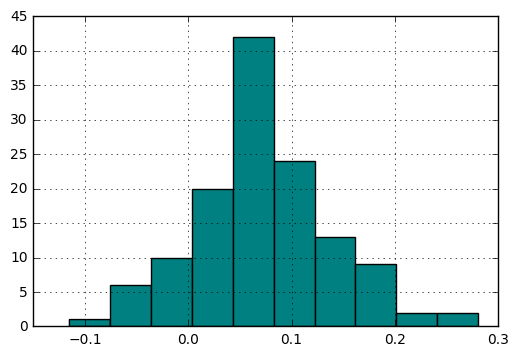

In [31]:
master["Staff_14_To_16_Increase_%"].hist(color='teal')

### This histogram looks at raw numbers and subtracts the number of choice hires from the increased number of staffers working at a station in 2016 compared to 2014

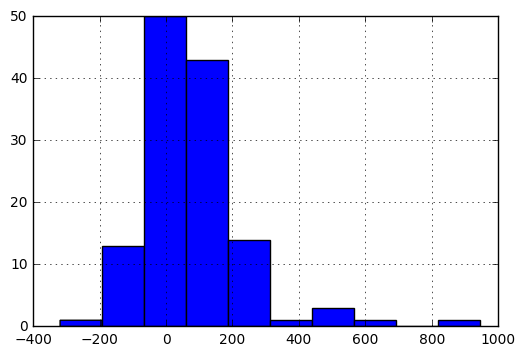

In [32]:
master["Choice_Staff_Dif"].hist()

## Question: What places so an increase in staff but had more choice hires than general staff increase?

'22 stations said they had more choice staffers than staff increases.'

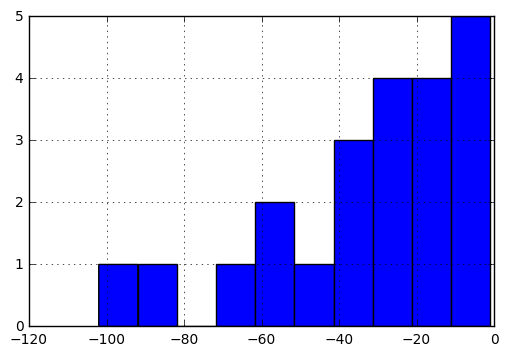

In [37]:
# First, we only want to look at places that increased in staff size
staff_increased = master[master["Staff_14_To_16_Increase_%"] >0]
# Next, let's look at those that had a negative number for "Choice_Staff_Dif
more_choice = staff_increased[staff_increased["Choice_Staff_Dif"] < 0]


more_choice["Choice_Staff_Dif"].hist()

"{} stations said they had more choice staffers than staff increases.".format(len(more_choice))

### Those stations are...

In [42]:
for station in more_choice["Location"]:
    print station

(V02) (528) Albany, NY
(V03) (561) New Jersey HCS, NJ
(V04) (503) Altoona, PA
(V04) (529) Butler, PA
(V04) (540) Clarksburg, WV
(V04) (562) Erie, PA
(V04) (642) Philadelphia, PA
(V04) (693) Wilkes��Barre, PA
(V05) (512) Baltimore HCS, MD
(V05) (688) Washington, DC
(V06) (637) Asheville, NC
(V09) (614) Memphis, TN
(V10) (539) Cincinnati, OH
(V11) (553) Detroit, MI
(V12) (585) Iron Mountain, MI
(V16) (520) Gulf Coast HCS, MS
(V18) (519) Big Spring, TX
(V20) (648) Portland, OR
(V20) (687) Walla Walla, WA
(V21) (654) Reno, NV
(V22) (691) Greater Los Angeles HCS
(V23) (656) St. Cloud, MN


In [45]:
more_choice[["Choice_Staff_Dif","Location","MAY-FY16"]]

,Choice_Staff_Dif,Location,MAY-FY16
8,-12.0,"(V02) (528) Albany, NY",50.0
14,-1.0,"(V03) (561) New Jersey HCS, NJ",2863.0
19,-55.0,"(V04) (503) Altoona, PA",670.0
20,-28.0,"(V04) (529) Butler, PA",577.0
21,-13.0,"(V04) (540) Clarksburg, WV",927.0
23,-26.0,"(V04) (562) Erie, PA",693.0
25,-102.0,"(V04) (642) Philadelphia, PA",2373.0
27,-13.0,"(V04) (693) Wilkes��Barre, PA",1256.0
28,-34.0,"(V05) (512) Baltimore HCS, MD",3411.0
30,-37.0,"(V05) (688) Washington, DC",2465.0
